<a href="https://colab.research.google.com/github/Susmitha0211/Vehicle/blob/main/with_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically

In [ ]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/cars_train', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/drive/MyDrive/cars_test', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)
labels=[]
labels.append(0)

print(labels)

Found 180 images belonging to 2 classes.
Found 37 images belonging to 2 classes.
[0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=5)

Epoch 1/5
12/12 [==============================] - 71s 6s/step - loss: 1.6881 - binary_accuracy: 0.5217 - val_loss: 1.4951 - val_binary_accuracy: 0.6250
Epoch 2/5
12/12 [==============================] - 67s 6s/step - loss: 1.0809 - binary_accuracy: 0.6087 - val_loss: 0.8914 - val_binary_accuracy: 0.6250
Epoch 3/5
12/12 [==============================] - 69s 6s/step - loss: 1.0494 - binary_accuracy: 0.6771 - val_loss: 0.8009 - val_binary_accuracy: 0.8125
Epoch 4/5
12/12 [==============================] - 69s 6s/step - loss: 0.9327 - binary_accuracy: 0.6562 - val_loss: 1.1291 - val_binary_accuracy: 0.5625
Epoch 5/5
12/12 [==============================] - 67s 6s/step - loss: 0.7723 - binary_accuracy: 0.7391 - val_loss: 0.9556 - val_binary_accuracy: 0.6875


In [ ]:
import numpy as np
import warnings
from keras.models import Model
from keras.layers import Flatten 
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D 
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image 
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as X 
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input 
from keras.applications.imagenet_utils import obtain_input_shape

In [ ]:
import tensorflow as tf

(1, 224, 224, 3)


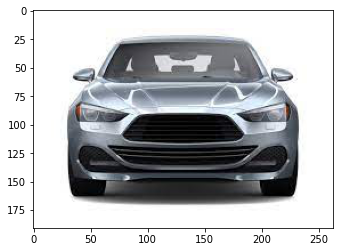

In [ ]:
from matplotlib.pyplot import imread,imshow
from tensorflow.keras.utils import load_img, img_to_array
import keras
img_path='/content/drive/MyDrive/cars/front/f1.jpg'
img=keras.utils.load_img(img_path,target_size=(224,224))
x=keras.utils.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)
print(x.shape)
my_image=imread(img_path)
imshow(my_image)

In [ ]:
model.predict(x)

1/1 [==============================] - 1s 761ms/step


array([[6.09729]], dtype=float32)

In [ ]:
!pip install pyyaml h5py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)


2.9.2


In [ ]:
model.save("image_classification.hdf5")

In [ ]:
!pip install -q streamlit

     |████████████████████████████████| 10.3 MB 2.7 MB/s 
     |████████████████████████████████| 182 kB 21.9 MB/s 
     |████████████████████████████████| 78 kB 4.6 MB/s 
     |████████████████████████████████| 164 kB 11.7 MB/s 
     |████████████████████████████████| 237 kB 36.9 MB/s 
     |████████████████████████████████| 4.7 MB 38.6 MB/s 
     |████████████████████████████████| 62 kB 942 kB/s 
     |████████████████████████████████| 51 kB 2.1 MB/s 


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import cv2
from PIL import Image, ImageOps
import numpy as np
 
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/drive/MyDrive/image_classification.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()
 
st.write("""
         # Image Classification
         please only upload images of jpg format
         """
         )
 
file = st.file_uploader("Upload the image to be classified U0001F447", type=["jpg", "png"])
st.set_option('deprecation.showfileUploaderEncoding', False)
 
def upload_predict(upload_image, model):
    
        size = (224,224)    
        image = ImageOps.fit(upload_image, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_resize = cv2.resize(img, dsize=(224, 224),interpolation=cv2.INTER_CUBIC)
        
        img_reshape = img_resize[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = upload_predict(image, model)
    if(predictions[0]>0):
      st.write("its the rear view of the car")
      st.write("if u think the result is incorrect try using a better resolution image")
    else:
      st.write("its front view of a car")
      st.write("if u think the result is incorrect try using a better resolution image")


Overwriting app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[##................] | fetchMetadata: sill resolveWithNewModule ansi-styles@4.3


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://104.196.14.178:8501

npx: installed 22 in 3.359s
your url is: https://sad-crabs-train-104-196-14-178.loca.lt
2022-11-28 06:26:21.937249: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
1/1 [==============================] - 1s 584ms/step
